# Demo: version 14

# Data science and Data engineering workflow

The idea is to show how a Data science (DS) team can work with scanflow. Later,
how a Data engineering (DE) team can gather this insight and metadata to deploy 
a workflow to start making predictions in production.

1. The DS team deploys its workflows to see if everything runs as expected (in order to get the final model).

2. The DE needs some steps of those workflows in order to put the model in production.

3. scanflow will check their workflows over time to raise alerts if something goes wrong.


News: 

- **New module: Interact. It will be used for improving the deployed model with a human help.**

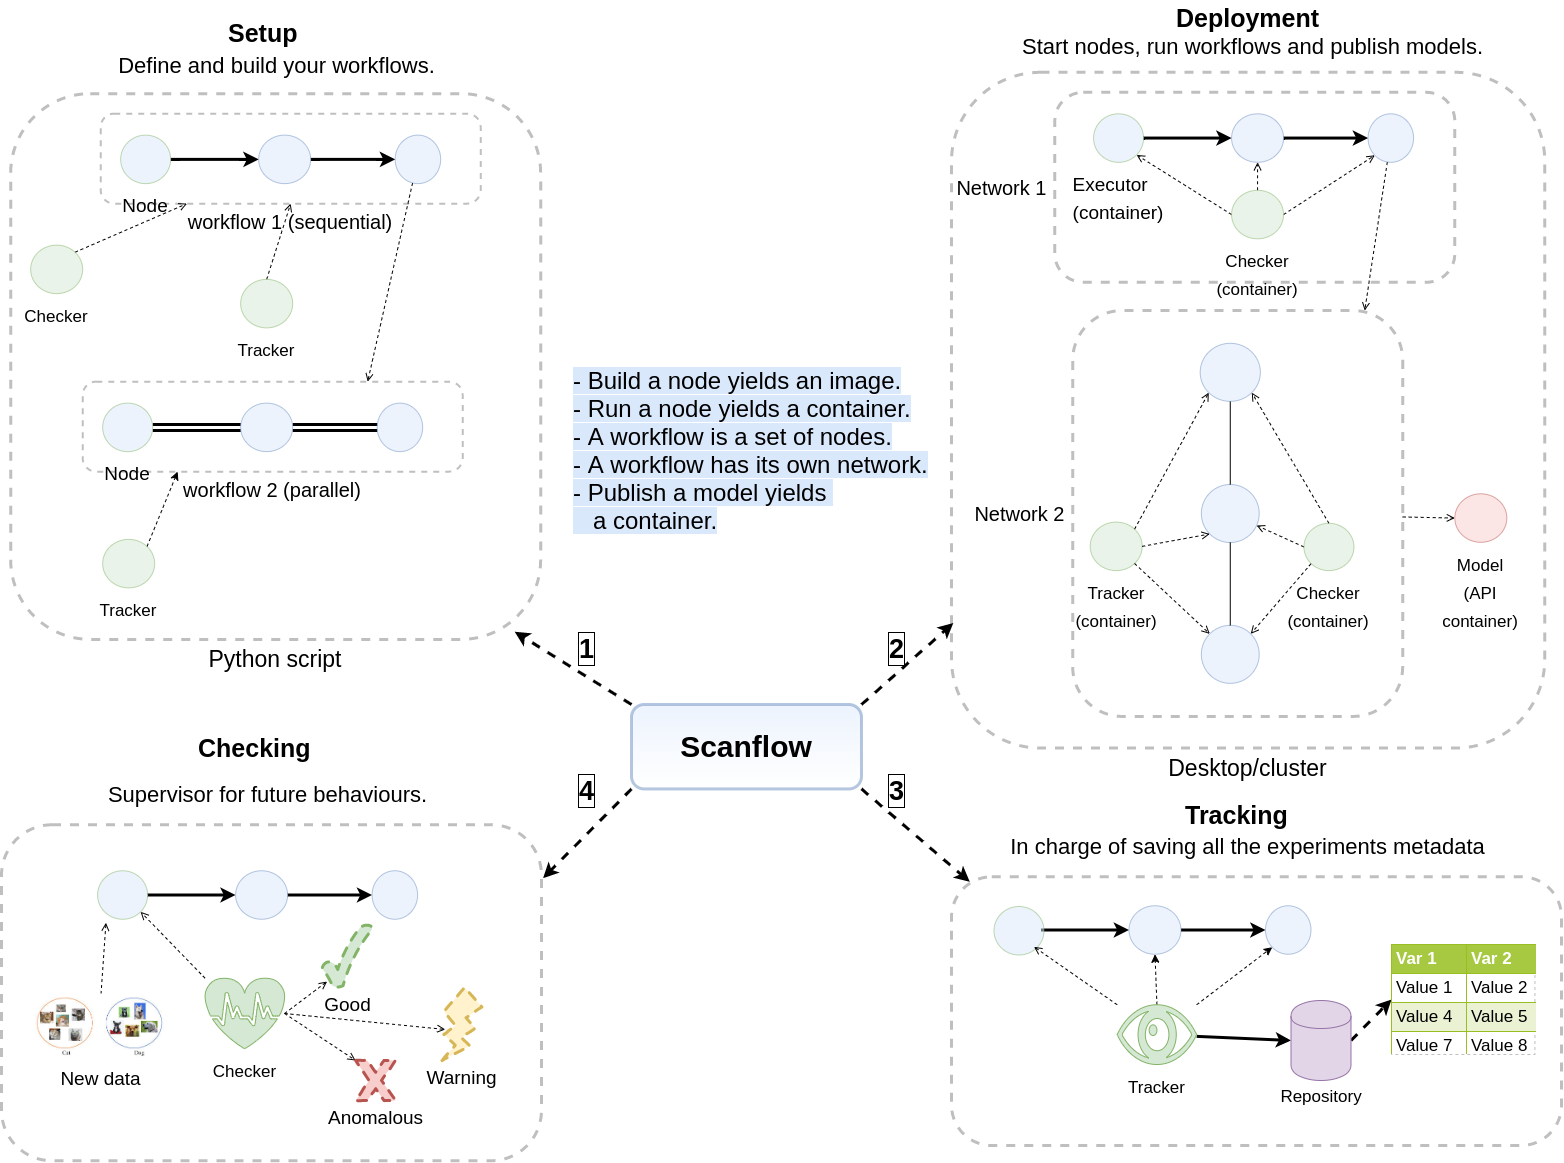

In [1]:
from IPython.display import Image
Image("pictures/scanflow2.png", width=800, height=800)

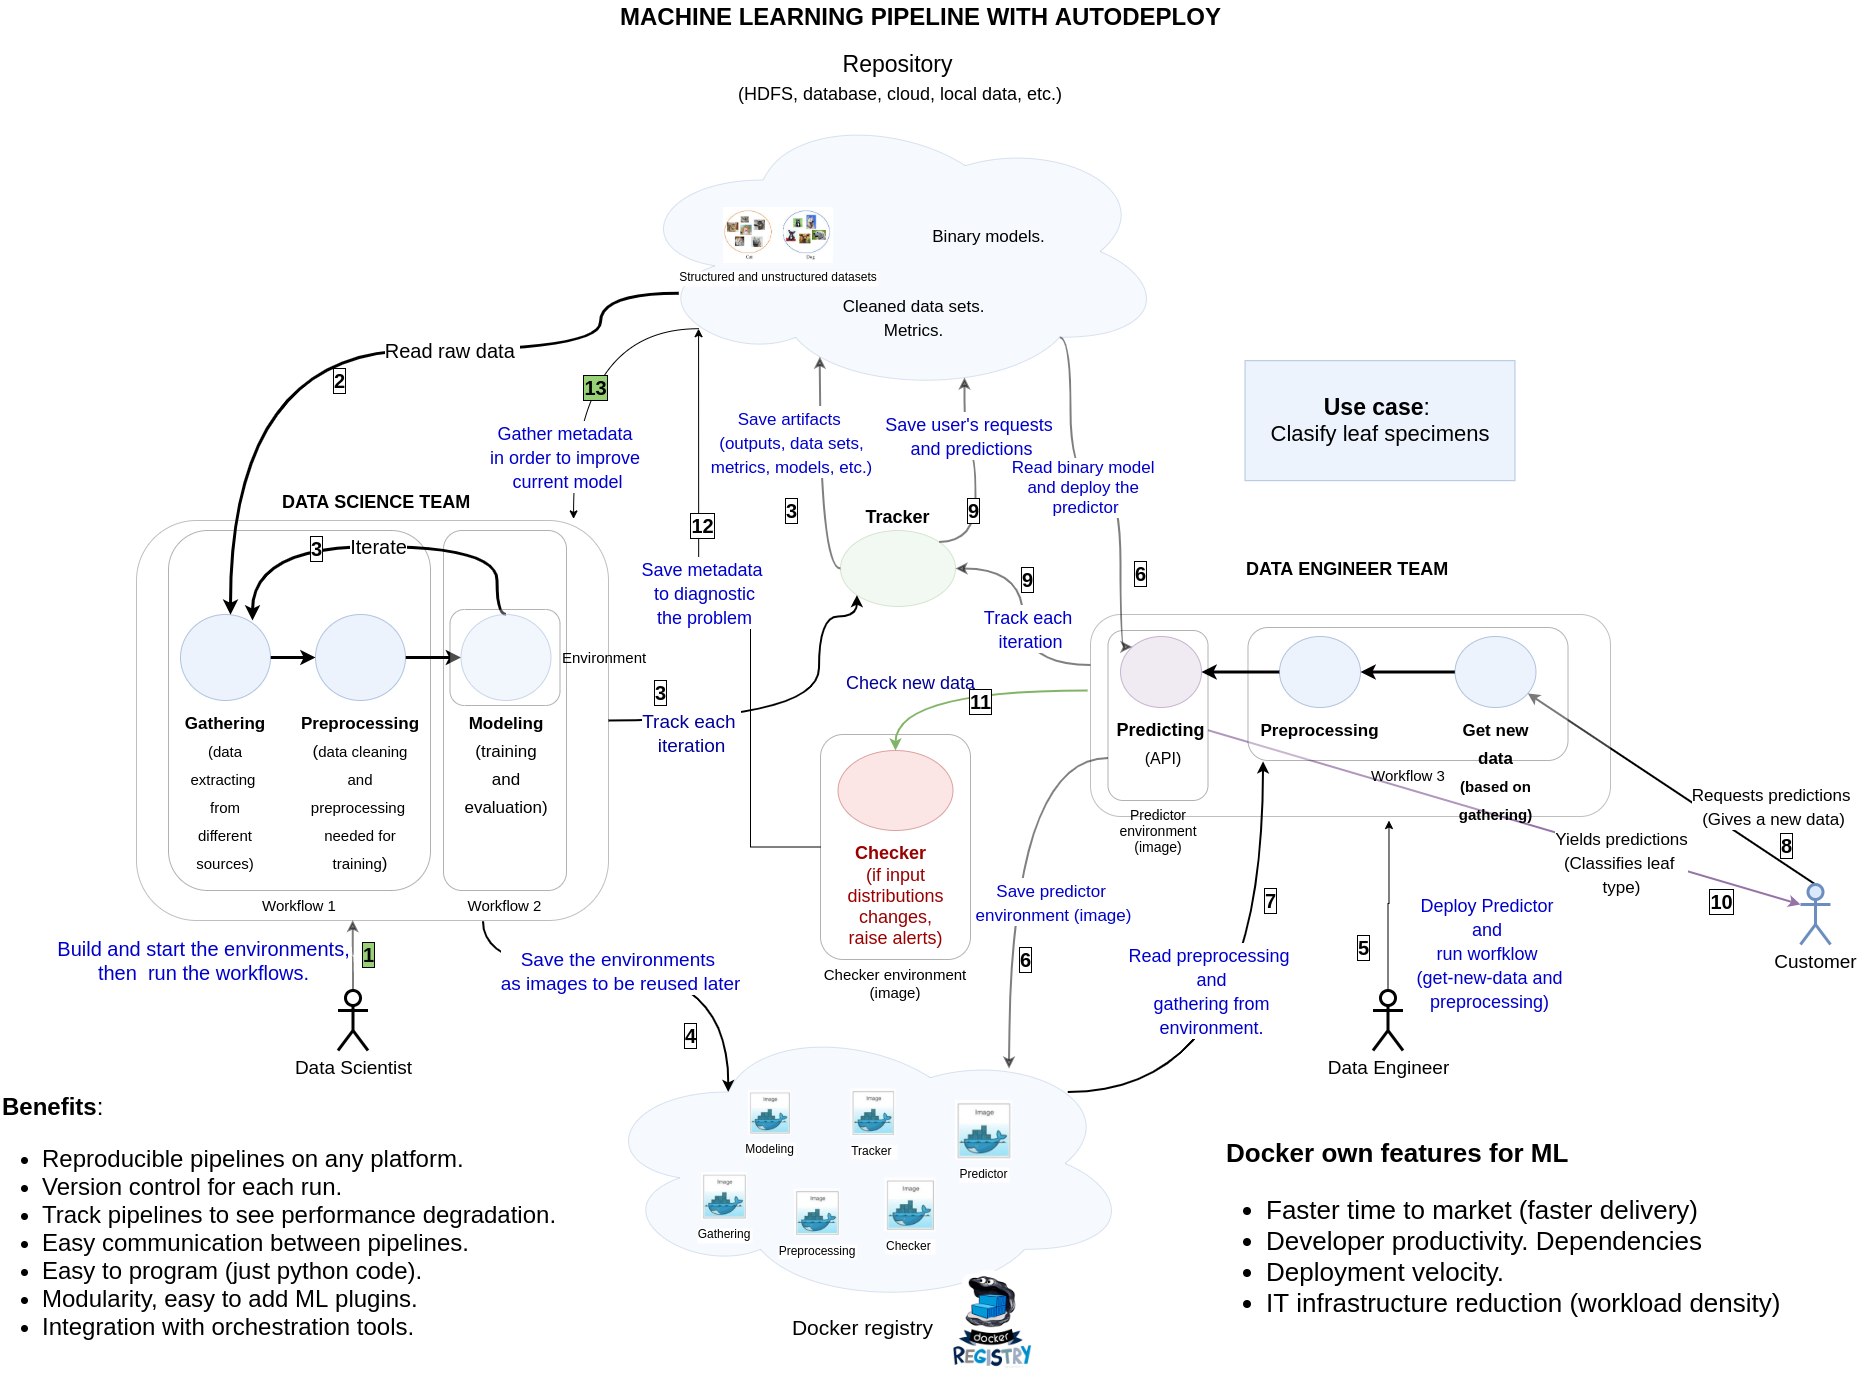

In [2]:
from IPython.display import Image
Image("pictures/scanflow_usecase8.png", width=800, height=800)

# Data science team

1. Build the workflows (build images)
2. Start the worklfows (start containers)
3. Run the workflows (run the python files on the containers)

##  Problem: Clasify leaf specimens

This data set consists of a collection of features that measure shape and texture extracted from digital images of leaf specimens from a total of 40 different plant species. It was collected in February 2014 at the Faculty of Science, Universidade do Porto, Portugal.https://archive.ics.uci.edu/ml/datasets/leaf

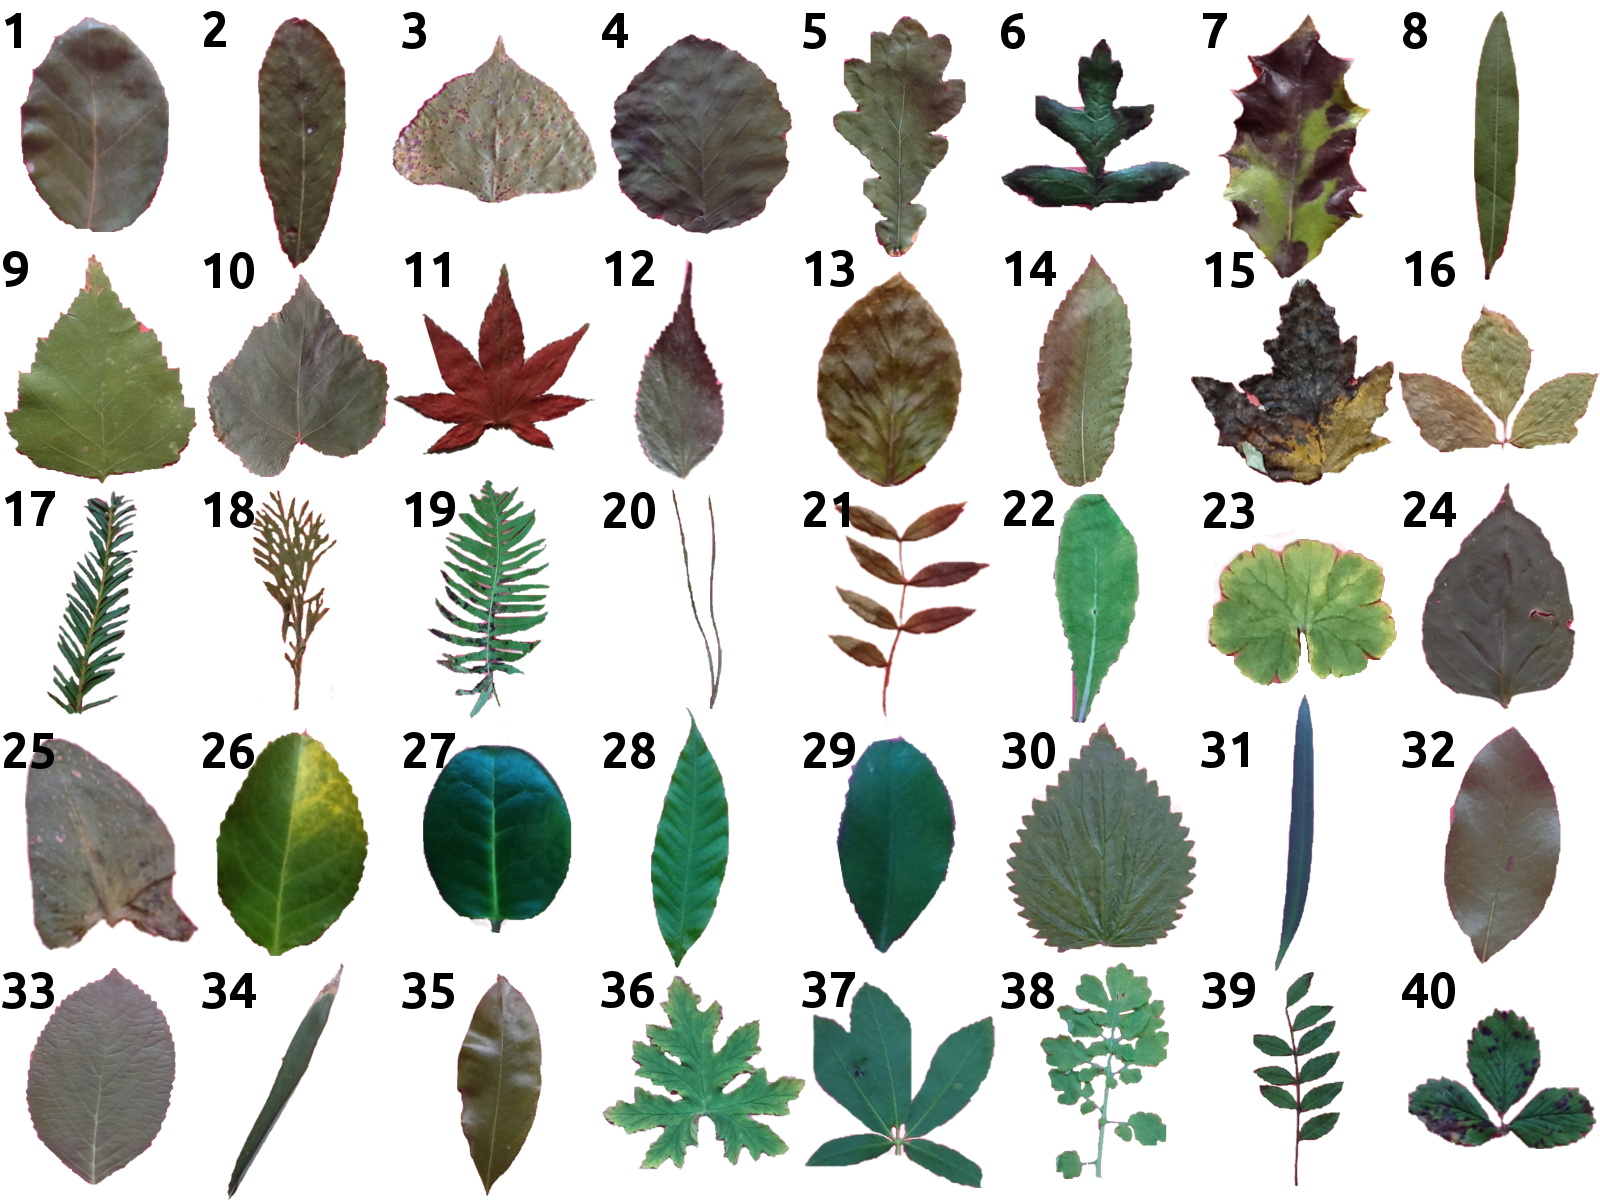

In [3]:
from IPython.display import Image
Image("pictures/plants.png", width=400, height=400)

## Build, start and run workflows

Build, start and run each environment inside each workflow


In [49]:
%%time

from scanflow.setup import Setup, Executor, Tracker, Workflow
from scanflow.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-science/'

# Workflows

executors = [Executor(name='gathering', 
                       file='gathering.py',
                       parameters={'raw_dataset': 'leaf.csv'},
                       dockerfile='Dockerfile_gathering'),
              Executor(name='preprocessing', 
                       file='preprocessing.py',
                       parameters={'training': 'training.csv',
                                   'testing': 'testing.csv'},
                       requirements='req_preprocessing.txt'),
              
              Executor(name='modeling', 
                      file='modeling.py',
                      parameters={'training': ['X_train.csv', 'y_train.csv'],
                                  'testing': ['X_test.csv', 'y_test.csv'],
                                  'model_path': 'models',
                                  'n_estimators': 3},
                      requirements='req_modeling.txt')
              ]

workflow1 = Workflow(name='workflow1', 
                     executors=executors,
                     tracker=Tracker(port=8001))


workflower = Setup(app_dir, workflows=[workflow1],
                             verbose=False)

# Build the nodes
workflower.build_workflows()

# Start containers and run workflows
deployer = Deploy(app_dir, workflower, verbose=True)

deployer.start_workflows()
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]03-Mar-20 14:54:38 -  INFO - [++] Starting workflow: [workflow1].
03-Mar-20 14:54:38 -  WARNING - [+] Network: [network_workflow1] is already running.
03-Mar-20 14:54:38 -  INFO - [+] Starting env: [workflow1:gathering].
03-Mar-20 14:54:38 -  WARNING - [+] Environment: [gathering] is already running.
03-Mar-20 14:54:38 -  INFO - [+] Starting env: [workflow1:preprocessing].
03-Mar-20 14:54:38 -  WARNING - [+] Environment: [preprocessing] is already running.
03-Mar-20 14:54:38 -  INFO - [+] Starting env: [workflow1:modeling].
03-Mar-20 14:54:38 -  WARNING - [+] Environment: [modeling] is already running.
03-Mar-20 14:54:38 -  INFO - [+] Starting env: [tracker-workflow1:modeling].
03-Mar-20 14:54:38 -  WARNING - [+] Environment: [tracker-workflow1] is already running.
03-Mar-20 14:54:38 -  INFO - [+] Workflow: [workflow1] was started successfully.
  0%|          | 0/1 [00:00<?, ?it/s]03-Mar-20 14:54:38 -  INFO - [++] Running workflow: [workflow1].
03-M

CPU times: user 240 ms, sys: 8.88 ms, total: 249 ms
Wall time: 8.21 s


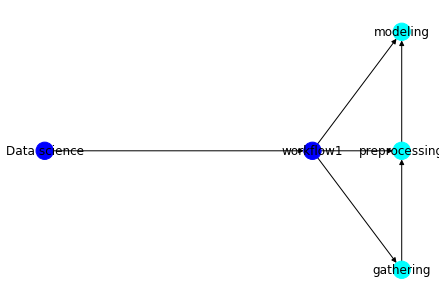

In [8]:
workflower.draw_workflow('Data science')

In [6]:
# workflower.workflows

In [7]:
# workflower.stop_workflows()

03-Mar-20 14:05:18 -  INFO - [+] Environment: [gathering] was stopped successfully.
03-Mar-20 14:05:18 -  INFO - [+] Environment: [preprocessing] was stopped successfully.
03-Mar-20 14:05:18 -  INFO - [+] Environment: [modeling] was stopped successfully.
03-Mar-20 14:05:19 -  INFO - [+] Tracker: [tracker-workflow1] was stopped successfully.
03-Mar-20 14:05:19 -  INFO - [+] Stopped containers were pruned.
03-Mar-20 14:05:19 -  INFO - [+] Network: [network_workflow1] was stopped successfully.
03-Mar-20 14:05:19 -  INFO - [+] Removed network was pruned.


With those runnings we ensure that the data science pipeline (gathering, preprocessing, modeling) is working perfectly.

# Data engineering team

- Build the predictor
- Build or read the workflows (build or read images)
- Start the worklfows (start containers)
- Run the workflows (run the python files on the containers)

## Build and run the predictor

Read predictor image from environment

TODO: get the last experiment

TODO: get tracker from localhost or uri

In [2]:
from scanflow.track import Tracker

app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-science/'
tracker = Tracker(app_dir)
tracker.get_tracked_values(workflow_name='workflow1', executor_name='modeling').head()



end_time  metrics.test_acc params.dtypes  \
0  2020-03-03 13:19:07.578000+00:00             0.627          None   
3  2020-03-03 13:14:25.928000+00:00             0.627          None   
6  2020-03-03 13:13:14.482000+00:00             0.735          None   
9  2020-03-03 13:12:23.343000+00:00             0.735          None   
12 2020-03-03 13:11:45.025000+00:00             0.735          None   

   params.n_classes params.n_estimators_model params.n_features  \
0              None                         3              None   
3              None                         3              None   
6              None                         3              None   
9              None                         3              None   
12             None                         3              None   

   params.n_rows_raw params.n_samples params.problem_type  \
0               None             None                None   
3               None             None                None   
6               None             None                None   
9               None             None                None   
12              None             None                None   

   params.random_state_model params.random_state_split params.test_percentage  \
0                         42                      None                   None   
3                         42                      None                   None   
6                         42                      None                   None   
9                         42                      None                   None   
12                        42                      None                   None   

   params.x_test_len params.x_train_len                            run_id  \
0               None               None  f0959b5cfe594d4195e3dfe7e9567e46   
3               None               None  6c71c4f642a54f95b9d659ed9447c6ea   
6               None               None  e702eee1e73c46f7924c2ca00c511ff8   
9               None               None  53f3c5c36a944e1c97e1cdd48e84abd0   
12              None               None  7af2a1acd28b448d865fcf34abfcc86b   

                         start_time tags.mlflow.runName  \
0  2020-03-03 13:19:07.506000+00:00            modeling   
3  2020-03-03 13:14:25.850000+00:00            modeling   
6  2020-03-03 13:13:14.409000+00:00            modeling   
9  2020-03-03 13:12:23.265000+00:00            modeling   
12 2020-03-03 13:11:44.949000+00:00            modeling   

   tags.mlflow.source.name  
0              modeling.py  
3              modeling.py  
6              modeling.py  
9              modeling.py  
12             modeling.py

In [3]:
artifacts = tracker.list_artifacts(workflow_name='workflow1', 
                            run_id='6c71c4f642a54f95b9d659ed9447c6ea')
artifacts

{'models': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/6c71c4f642a54f95b9d659ed9447c6ea/artifacts/models'}

In [4]:
%%time

from scanflow.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-eng/'
# model_path = '/home/guess/Desktop/scanflow/examples/demo2/data-science/workflow/models'
model_path = artifacts['models'] # you can choose the path from the artifact path

# Read the platform
deployer_eng = Deploy(app_dir, verbose=True)

# Build a predictor, if there is not an image, build a new one
deployer_eng.build_predictor(image='predictor', model_path=model_path)

# Run predictor, provides name and port for the container.
deployer_eng.run_predictor(name='predictor', port=5001)

deployer_eng

03-Mar-20 14:19:17 -  INFO - [++] Building predictor [image:predictor] as API. Please wait.
03-Mar-20 14:19:17 -  WARNING - [+] Image [predictor] already exists.
03-Mar-20 14:19:17 -  INFO - [+] Predictor: predictor loaded successfully.
03-Mar-20 14:19:17 -  INFO - [++] Running predictor [predictor].
03-Mar-20 14:19:17 -  WARNING - [+] Environment: [predictor] is already running.
03-Mar-20 14:19:17 -  INFO - [+] Predictor API at [http://localhost:5001]. 


CPU times: user 12.1 ms, sys: 0 ns, total: 12.1 ms
Wall time: 16 ms



Predictor = (
    Name: predictor,
    Environment(image): <Image: 'app_single_api:latest', 'predictor:latest'>,
    Container: None,
    URL=0.0.0.0:5001),

In [11]:
# deployer_eng.stop_predictor(name='predictor')

## Build and start workflows for predicting

In [6]:
%%time

import pandas as pd
import os

from scanflow.check import tools
from scanflow.setup import Setup, Executor, Tracker, Workflow
from scanflow.run import Run
from scanflow.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-eng/'

# Simulate new requests from user
# df_input = pd.read_csv(os.path.join(app_dir, 'workflow', 'X_test.csv'))
# df_noise = tools.add_noise(df_input, sigma=0.003) # Predictions drawn from drafted distribution
# # df_noise = df_input
# df_noise.to_csv(os.path.join(app_dir, 'workflow', 'new_data.csv'), index=False)

# Workflows

executors3 = [Executor(name='preprocessing_new_data', 
                       file='preprocessing_new_data.py',
                       parameters={'gathered_data': 'testing_noise.csv',
                                   'output_data': 'preprocessed_data.csv'},
                       env='preprocessing')]
# Sequential
workflow3 = Workflow(name='workflow3', 
                     executors=executors3,
                     tracker=Tracker(port=8003))



# Build and run environments (containers)
# workflow_dataeng = Setup(app_dir, workflows_eng, verbose=False)
workflow_dataeng = Setup(app_dir, workflows=[workflow3],
                             verbose=False)
workflow_dataeng.run_pipeline()

# Read the workflows and run them
runner_eng = Run(workflow_dataeng, verbose=True)
runner_eng.run_workflows()

# Make predictions
deployer_eng = Deploy(app_dir, verbose=True)
predictions = deployer_eng.predict('preprocessed_data.csv', port=5001)

predictions.head()

03-Mar-20 14:33:37 -  INFO - [++] Running workflow: [workflow3].
03-Mar-20 14:33:37 -  INFO - [+] Running env: [workflow3:preprocessing_new_data].
03-Mar-20 14:33:38 -  INFO - [+] Running (preprocessing_new_data.py). 
03-Mar-20 14:33:38 -  INFO - [+] Output:   
03-Mar-20 14:33:38 -  INFO - [+] Environment (preprocessing_new_data) finished successfully. 
03-Mar-20 14:33:38 -  INFO - [+] Workflow: [workflow3] was run successfully.
03-Mar-20 14:33:38 -  INFO - Predicting from port: 5001
03-Mar-20 14:33:38 -  INFO - Time elapsed: 0.019702434539794922
03-Mar-20 14:33:38 -  INFO - Input and predictions were saved at: /home/guess/Desktop/scanflow/examples/demo3/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_03_03_14_33_38.csv


CPU times: user 48.6 ms, sys: 10.4 ms, total: 59 ms
Wall time: 1.49 s


eccentricity  aspect_ratio  elongation  solidity  stochastic_convexity  \
0      0.997989     10.115162    0.923194  0.809887              0.907213   
1      0.866550      1.877480    0.618848  0.821252              0.854202   
2      0.829745      1.982865    0.510254  0.946414              0.998143   
3      0.729631      1.474207    0.330482  0.997801              0.995178   
4      0.994769      9.733944    0.904781  0.935446              0.988968   

   isoperimetric_factor  maximal_indentation_depth  lobedness  \
0              0.147297                   0.120424   2.736239   
1              0.333635                   0.044043   0.403552   
2              0.564114                   0.017665   0.121036   
3              0.842854                   0.003746   0.003947   
4              0.192667                   0.027296   0.073623   

   average_intensity  average_contrast  smoothness  third_moment  uniformity  \
0           0.006099          0.052982    0.002868     -0.001050    0.006447   
1           0.037927          0.113321    0.012889      0.001135   -0.001460   
2           0.080364          0.166023    0.027382      0.002692   -0.000233   
3           0.022629          0.077942    0.008229      0.002676    0.000945   
4           0.016144          0.077012    0.006473      0.000033   -0.000580   

    entropy  pred  
0  0.274932    31  
1  1.010006     5  
2  1.804871    12  
3  0.981539    13  
4  0.488441    31

Once we have the workflows (get_new_data and preprocessing) and the predictor.
We were able to make predictions from new data.

In [8]:
# workflow_dataeng.draw_workflow('Engineering')

In [14]:
# workflow_dataeng.stop_workflows()

In [15]:
# runner_eng.workflows

## Tracker

In [13]:
from scanflow.track import Tracker

app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-science/'
tracker = Tracker(app_dir)
tracker

df = tracker.get_tracked_values(workflow_name='workflow1',
                                executor_name='preprocessing')
df.head(2)

end_time  metrics.test_acc params.dtypes  \
1 2020-03-03 13:19:06.187000+00:00               NaN          None   
4 2020-03-03 13:14:24.446000+00:00               NaN          None   

  params.n_classes params.n_estimators_model params.n_features  \
1             None                      None              None   
4             None                      None              None   

  params.n_rows_raw params.n_samples params.problem_type  \
1              None             None                None   
4              None             None                None   

  params.random_state_model params.random_state_split params.test_percentage  \
1                      None                      None                   None   
4                      None                      None                   None   

  params.x_test_len params.x_train_len                            run_id  \
1               102                272  1813b0e6dcfa4d9c80c9e21b272ae17f   
4               102                272  0aed51ca4251474cb7c58680111beb6c   

                        start_time tags.mlflow.runName tags.mlflow.source.name  
1 2020-03-03 13:19:06.098000+00:00       preprocessing        preprocessing.py  
4 2020-03-03 13:14:24.351000+00:00       preprocessing        preprocessing.py

In [14]:
tracker.list_artifacts('workflow1', run_id='1813b0e6dcfa4d9c80c9e21b272ae17f')

{'y_train.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/y_train.csv',
 'X_test.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/X_test.csv',
 'X_train.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/X_train.csv',
 'y_test.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/y_test.csv'}

In [6]:
tracker


Tracker = (
    Workflows: ['workflow1']
    App directory: /home/guess/Desktop/scanflow/examples/demo3/data-science/
)

## Checker

Analyze the tracked values.

### Exploratory

In [15]:
from scanflow.check import Checker

df = tracker.get_tracked_values(workflow_name='workflow1',
                                executor_name='preprocessing')

checker = Checker(tracker)

print(checker)

print(df.shape)
df.head()


Checker = (
    Tracker = (
        Workflows: ['workflow1']
        App directory: /home/guess/Desktop/scanflow/examples/demo3/data-science/
    )
)

(40, 18)


end_time  metrics.test_acc params.dtypes  \
1  2020-03-03 13:19:06.187000+00:00               NaN          None   
4  2020-03-03 13:14:24.446000+00:00               NaN          None   
7  2020-03-03 13:13:13.108000+00:00               NaN          None   
10 2020-03-03 13:12:21.957000+00:00               NaN          None   
13 2020-03-03 13:11:43.626000+00:00               NaN          None   

   params.n_classes params.n_estimators_model params.n_features  \
1              None                      None              None   
4              None                      None              None   
7              None                      None              None   
10             None                      None              None   
13             None                      None              None   

   params.n_rows_raw params.n_samples params.problem_type  \
1               None             None                None   
4               None             None                None   
7               None             None                None   
10              None             None                None   
13              None             None                None   

   params.random_state_model params.random_state_split params.test_percentage  \
1                       None                      None                   None   
4                       None                      None                   None   
7                       None                      None                   None   
10                      None                      None                   None   
13                      None                      None                   None   

   params.x_test_len params.x_train_len                            run_id  \
1                102                272  1813b0e6dcfa4d9c80c9e21b272ae17f   
4                102                272  0aed51ca4251474cb7c58680111beb6c   
7                102                272  dcc75a6e8f3f47db96f4dfec89e9f773   
10               102                272  34b3c250d64943dbac25e1d07e1ab758   
13               102                272  16c9f66176e1474194944d78f9726bd6   

                         start_time tags.mlflow.runName  \
1  2020-03-03 13:19:06.098000+00:00       preprocessing   
4  2020-03-03 13:14:24.351000+00:00       preprocessing   
7  2020-03-03 13:13:13.024000+00:00       preprocessing   
10 2020-03-03 13:12:21.874000+00:00       preprocessing   
13 2020-03-03 13:11:43.542000+00:00       preprocessing   

   tags.mlflow.source.name  
1         preprocessing.py  
4         preprocessing.py  
7         preprocessing.py  
10        preprocessing.py  
13        preprocessing.py

In [16]:
df[['params.n_classes', 'params.n_samples']].head()

params.n_classes params.n_samples
1              None             None
4              None             None
7              None             None
10             None             None
13             None             None

In [9]:
checker.explore(df[['params.n_classes', 'params.n_samples']])

02-Mar-20 18:46:26 -  INFO - NumExpr defaulting to 4 threads.


## Checking Anomaly

### Checker type = statistical (basic)

Based on non-parametric statistical tests

In [17]:
df = tracker.get_tracked_values(workflow_name='workflow1',
                                executor_name='preprocessing')
df.head(2)

end_time  metrics.test_acc params.dtypes  \
1 2020-03-03 13:19:06.187000+00:00               NaN          None   
4 2020-03-03 13:14:24.446000+00:00               NaN          None   

  params.n_classes params.n_estimators_model params.n_features  \
1             None                      None              None   
4             None                      None              None   

  params.n_rows_raw params.n_samples params.problem_type  \
1              None             None                None   
4              None             None                None   

  params.random_state_model params.random_state_split params.test_percentage  \
1                      None                      None                   None   
4                      None                      None                   None   

  params.x_test_len params.x_train_len                            run_id  \
1               102                272  1813b0e6dcfa4d9c80c9e21b272ae17f   
4               102                272  0aed51ca4251474cb7c58680111beb6c   

                        start_time tags.mlflow.runName tags.mlflow.source.name  
1 2020-03-03 13:19:06.098000+00:00       preprocessing        preprocessing.py  
4 2020-03-03 13:14:24.351000+00:00       preprocessing        preprocessing.py

In [18]:
tracker.list_artifacts('workflow1', '1813b0e6dcfa4d9c80c9e21b272ae17f')

{'y_train.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/y_train.csv',
 'X_test.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/X_test.csv',
 'X_train.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/X_train.csv',
 'y_test.csv': '/home/guess/Desktop/scanflow/examples/demo3/data-science/ad-stuff/ad-tracker/tracker-workflow1/mlruns/0/1813b0e6dcfa4d9c80c9e21b272ae17f/artifacts/y_test.csv'}

In [19]:
X_train_path = tracker.list_artifacts('workflow1', '091883270cd943d6bf18f721dfb5d536')['X_train.csv']
X_train = pd.read_csv(X_train_path)
X_train.head(2)

eccentricity  aspect_ratio  elongation  solidity  stochastic_convexity  \
0       0.87163        2.0659     0.55339   0.94868                1.0000   
1       0.39092        1.0870     0.68174   0.50961                0.6614   

   isoperimetric_factor  maximal_indentation_depth  lobedness  \
0               0.60231                   0.031671    0.18255   
1               0.15361                   0.140820    3.60930   

   average_intensity  average_contrast  smoothness  third_moment  uniformity  \
0           0.049706          0.134400    0.017742      0.006692    0.000161   
1           0.028638          0.089135    0.007882      0.002118    0.000210   

   entropy  
0  1.40160  
1  0.90082

########## Comparing two numerical dataframes ##########

######## Kolmogorov-Smirnov test ########


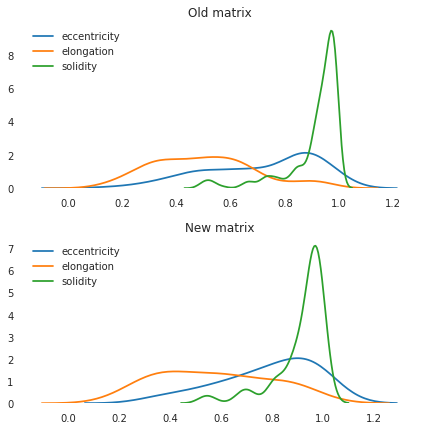

03-Mar-20 14:35:54 -  INFO - [+] Checker for file: [/home/guess/Desktop/scanflow/examples/demo3/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_03_03_14_33_38.csv] was run successfully.


               eccentricity elongation    solidity
p_value            0.256233  0.0551814    0.663498
explain  Slightly different  Different  Comparable


In [20]:
import os
import pandas as pd
from scanflow.check import Checker


app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-eng/'
tracker = Tracker(app_dir)
checker = Checker(tracker)


cols = ['eccentricity', 'elongation', 'solidity']

checker.drift_distribution(X_train, cols=cols, checker_type='statistical', verbose=True,)



### Checker type = Deep denoise autoencoder

Based on non-parametric statistical tests

New Checker based on autoencoders:


> This model will be applied to both new data and predictions (e.g, the model predicts a high loan).

> This new checker support realtime predictions (before was batch).

> Takes into account all features at once (before we analyzed one by one).

> Non linear decision boundaries (more complex models). Before we analyzed parametric, linear comparison.

> Unsupervised model. Before was also unsupervised, but less flexible to seasonality.

## Test set with high noise

- Possible explanation 1: All your requests seem to come from a different distribution, please check your query values.
- Possible explanation 2: All your requests are not behaving as expected, please check your sensors/users queries.

/home/guess/anaconda3/envs/venv2/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator MinMaxScaler from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.

/home/guess/anaconda3/envs/venv2/lib/python3.7/site-packages/sklearn/base.py:318: UserWarning:

Trying to unpickle estimator MinMaxScaler from version 0.21.3 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.



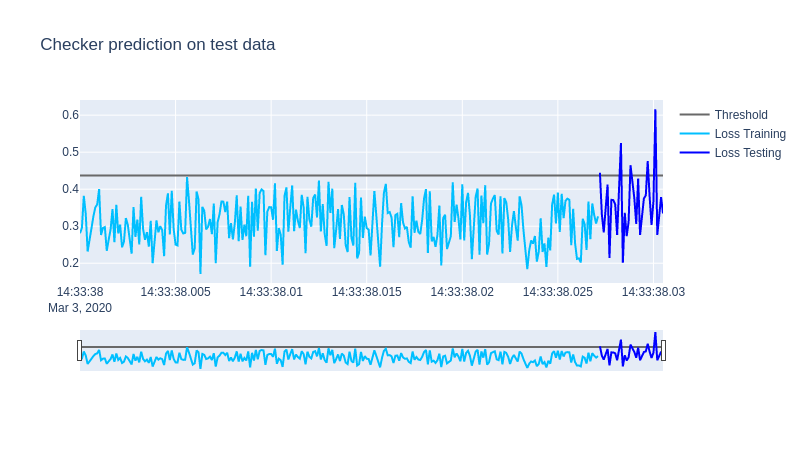

03-Mar-20 14:36:10 -  INFO - [+] Checker for file: [/home/guess/Desktop/scanflow/examples/demo3/data-eng/ad-stuff/ad-checker/predictions/input_predictions_2020_03_03_14_33_38.csv] was run successfully.


CPU times: user 516 ms, sys: 19.5 ms, total: 536 ms
Wall time: 542 ms


In [22]:
%%time

import os
import pandas as pd
from scanflow.check import Checker
from scanflow.track import Tracker

app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-science/'
tracker = Tracker(app_dir)
X_train_path = tracker.list_artifacts('workflow1', '091883270cd943d6bf18f721dfb5d536')['X_train.csv']
X_train = pd.read_csv(X_train_path)

app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-eng/'
tracker = Tracker(app_dir)
checker = Checker(tracker)

# df = tracker.get_tracked_values(workflow_name='workflow1',
#                                 executor_name='preprocessing')



E_test, X_test = checker.drift_distribution(X_train.copy(), checker_type='dd_autoencoder', verbose=True,)

# Interact

The idea behind the interact module is to include the human in the loop by finding the farthest points from the 
normal behaviour, then make a ranking based of their distances. Take the first 'N' points and label them.

These new points will be then added to the old training dataset and retrained the a new model with the same parameters. Our hypothesis is to get a higher accuracy because these points fill the gaps in the feature space.

In [23]:
X_test.head()

eccentricity  aspect_ratio  elongation  solidity  \
2020-03-03 14:33:38.027200      0.999182      0.505150    0.970091  0.639748   
2020-03-03 14:33:38.027300      0.850096      0.048298    0.608089  0.662162   
2020-03-03 14:33:38.027400      0.808349      0.054142    0.478922  0.908995   
2020-03-03 14:33:38.027500      0.694793      0.025933    0.265094  1.010337   
2020-03-03 14:33:38.027600      0.995530      0.484008    0.948189  0.887365   

                            stochastic_convexity  isoperimetric_factor  \
2020-03-03 14:33:38.027200              0.846254              0.088384   
2020-03-03 14:33:38.027300              0.758417              0.327346   
2020-03-03 14:33:38.027400              0.996922              0.622913   
2020-03-03 14:33:38.027500              0.992009              0.980371   
2020-03-03 14:33:38.027600              0.981720              0.146567   

                            maximal_indentation_depth  lobedness  \
2020-03-03 14:33:38.027200                   0.599498   0.379580   
2020-03-03 14:33:38.027300                   0.210083   0.055809   
2020-03-03 14:33:38.027400                   0.075599   0.016596   
2020-03-03 14:33:38.027500                   0.004639   0.000345   
2020-03-03 14:33:38.027600                   0.124703   0.010015   

                            average_intensity  average_contrast  smoothness  \
2020-03-03 14:33:38.027200           0.005802          0.079094    0.024352   
2020-03-03 14:33:38.027300           0.177246          0.322991    0.163582   
2020-03-03 14:33:38.027400           0.405834          0.536017    0.364953   
2020-03-03 14:33:38.027500           0.094842          0.179982    0.098841   
2020-03-03 14:33:38.027600           0.059908          0.176224    0.074442   

                            third_moment  uniformity   entropy  
2020-03-03 14:33:38.027200     -0.049649    2.198888  0.041563  
2020-03-03 14:33:38.027300      0.035131   -0.500886  0.331065  
2020-03-03 14:33:38.027400      0.095550   -0.081751  0.644115  
2020-03-03 14:33:38.027500      0.094909    0.320415  0.319853  
2020-03-03 14:33:38.027600     -0.007617   -0.200378  0.125651

In [24]:
error_anomaly = E_test[E_test['Anomaly']==True]
error_anomaly.head()

Loss_mae  Anomaly
2020-03-03 14:33:38.027200  0.444345     True
2020-03-03 14:33:38.028300  0.524715     True
2020-03-03 14:33:38.028800  0.464820     True
2020-03-03 14:33:38.029700  0.475866     True
2020-03-03 14:33:38.030100  0.616239     True

In [25]:
X_anomalies = X_test[E_test['Anomaly']==True]
X_anomalies.head()

eccentricity  aspect_ratio  elongation  solidity  \
2020-03-03 14:33:38.027200      0.999182      0.505150    0.970091  0.639748   
2020-03-03 14:33:38.028300      0.898512      0.076731    0.562932  0.967077   
2020-03-03 14:33:38.028800      0.995762      0.533769    0.952078  0.792724   
2020-03-03 14:33:38.029700      0.761346      0.038070    0.366268  0.975756   
2020-03-03 14:33:38.030100      0.585208      0.023445    0.236124  0.970886   

                            stochastic_convexity  isoperimetric_factor  \
2020-03-03 14:33:38.027200              0.846254              0.088384   
2020-03-03 14:33:38.028300              0.999153              0.749083   
2020-03-03 14:33:38.028800              0.931339              0.104300   
2020-03-03 14:33:38.029700              1.001843              0.887654   
2020-03-03 14:33:38.030100              0.989548              0.903765   

                            maximal_indentation_depth  lobedness  \
2020-03-03 14:33:38.027200                   0.599498   0.379580   
2020-03-03 14:33:38.028300                   0.015798   0.001681   
2020-03-03 14:33:38.028800                   0.117733   0.016076   
2020-03-03 14:33:38.029700                   0.049666   0.004733   
2020-03-03 14:33:38.030100                   0.073157   0.004028   

                            average_intensity  average_contrast  smoothness  \
2020-03-03 14:33:38.027200           0.005802          0.079094    0.024352   
2020-03-03 14:33:38.028300           0.014665          0.029957   -0.010258   
2020-03-03 14:33:38.028800           0.052969          0.135391    0.104194   
2020-03-03 14:33:38.029700           0.049543          0.170612    0.044764   
2020-03-03 14:33:38.030100           0.132409          0.215865    0.044359   

                            third_moment  uniformity   entropy  
2020-03-03 14:33:38.027200     -0.049649    2.198888  0.041563  
2020-03-03 14:33:38.028300      0.035914   -1.475968  0.042219  
2020-03-03 14:33:38.028800      0.152540    2.225082  0.137875  
2020-03-03 14:33:38.029700      0.077397    2.392629  0.101323  
2020-03-03 14:33:38.030100      0.050730   -3.215300  0.291649

In [46]:
X_interact = X_anomalies.join(error_anomaly['Loss_mae']).sort_values('Loss_mae', ascending=False)
# print(X_interact.shape)
X_interact

eccentricity  aspect_ratio  elongation  solidity  \
2020-03-03 14:33:38.030100      0.585208      0.023445    0.236124  0.970886   
2020-03-03 14:33:38.028300      0.898512      0.076731    0.562932  0.967077   
2020-03-03 14:33:38.029700      0.761346      0.038070    0.366268  0.975756   
2020-03-03 14:33:38.028800      0.995762      0.533769    0.952078  0.792724   
2020-03-03 14:33:38.027200      0.999182      0.505150    0.970091  0.639748   

                            stochastic_convexity  isoperimetric_factor  \
2020-03-03 14:33:38.030100              0.989548              0.903765   
2020-03-03 14:33:38.028300              0.999153              0.749083   
2020-03-03 14:33:38.029700              1.001843              0.887654   
2020-03-03 14:33:38.028800              0.931339              0.104300   
2020-03-03 14:33:38.027200              0.846254              0.088384   

                            maximal_indentation_depth  lobedness  \
2020-03-03 14:33:38.030100                   0.073157   0.004028   
2020-03-03 14:33:38.028300                   0.015798   0.001681   
2020-03-03 14:33:38.029700                   0.049666   0.004733   
2020-03-03 14:33:38.028800                   0.117733   0.016076   
2020-03-03 14:33:38.027200                   0.599498   0.379580   

                            average_intensity  average_contrast  smoothness  \
2020-03-03 14:33:38.030100           0.132409          0.215865    0.044359   
2020-03-03 14:33:38.028300           0.014665          0.029957   -0.010258   
2020-03-03 14:33:38.029700           0.049543          0.170612    0.044764   
2020-03-03 14:33:38.028800           0.052969          0.135391    0.104194   
2020-03-03 14:33:38.027200           0.005802          0.079094    0.024352   

                            third_moment  uniformity   entropy  Loss_mae  
2020-03-03 14:33:38.030100      0.050730   -3.215300  0.291649  0.616239  
2020-03-03 14:33:38.028300      0.035914   -1.475968  0.042219  0.524715  
2020-03-03 14:33:38.029700      0.077397    2.392629  0.101323  0.475866  
2020-03-03 14:33:38.028800      0.152540    2.225082  0.137875  0.464820  
2020-03-03 14:33:38.027200     -0.049649    2.198888  0.041563  0.444345

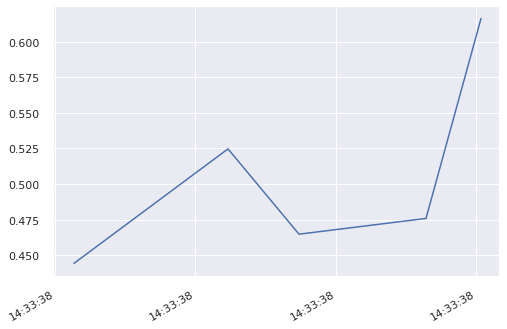

In [27]:
X_interact['Loss_mae'].plot()

## Retrain with the most important points

In [29]:
important_df = pd.read_csv('/home/guess/Desktop/scanflow/examples/demo3/data-science/workflow/testing_noise.csv')
important_df.head()

species  eccentricity  aspect_ratio  elongation  solidity  \
0       31      0.997989     10.115162    0.923194  0.809887   
1        5      0.866550      1.877480    0.618848  0.821252   
2       12      0.829745      1.982865    0.510254  0.946414   
3       27      0.729631      1.474207    0.330482  0.997801   
4       31      0.994769      9.733944    0.904781  0.935446   

   stochastic_convexity  isoperimetric_factor  maximal_indentation_depth  \
0              0.907213              0.147297                   0.120424   
1              0.854202              0.333635                   0.044043   
2              0.998143              0.564114                   0.017665   
3              0.995178              0.842854                   0.003746   
4              0.988968              0.192667                   0.027296   

   lobedness  average_intensity  average_contrast  smoothness  third_moment  \
0   2.736239           0.006099          0.052982    0.002868     -0.001050   
1   0.403552           0.037927          0.113321    0.012889      0.001135   
2   0.121036           0.080364          0.166023    0.027382      0.002692   
3   0.003947           0.022629          0.077942    0.008229      0.002676   
4   0.073623           0.016144          0.077012    0.006473      0.000033   

   uniformity   entropy  
0    0.006447  0.274932  
1   -0.001460  1.010006  
2   -0.000233  1.804871  
3    0.000945  0.981539  
4   -0.000580  0.488441

In [43]:
# important_df[X_interact['eccentricity'].isin(important_df['eccentricity'])]

In [50]:
%%time

from scanflow.setup import Setup, Executor, Tracker, Workflow
from scanflow.deploy import Deploy

# App folder
app_dir = '/home/guess/Desktop/scanflow/examples/demo3/data-science/'

# Workflows

executors = [Executor(name='preprocessing', 
                       file='preprocessing.py',
                       parameters={'training': 'training_noise.csv',
                                   'testing': 'testing.csv'},
                       requirements='req_preprocessing.txt'),    
             
              Executor(name='modeling', 
                      file='modeling.py',
                      parameters={'training': ['X_train.csv', 'y_train.csv'],
                                  'testing': ['X_test.csv', 'y_test.csv'],
                                  'model_path': 'models',
                                  'n_estimators': 3},
                      requirements='req_modeling.txt')
              ]

workflow1 = Workflow(name='workflow1', 
                     executors=executors,
                     tracker=Tracker(port=8001))


workflower = Setup(app_dir, workflows=[workflow1],
                             verbose=False)

# Build the nodes
workflower.build_workflows()

# Start containers and run workflows
deployer = Deploy(app_dir, workflower, verbose=True)

deployer.start_workflows()
deployer.run_workflows()

  0%|          | 0/1 [00:00<?, ?it/s]03-Mar-20 14:54:58 -  INFO - [++] Starting workflow: [workflow1].
03-Mar-20 14:54:58 -  WARNING - [+] Network: [network_workflow1] is already running.
03-Mar-20 14:54:58 -  INFO - [+] Starting env: [workflow1:preprocessing].
03-Mar-20 14:54:58 -  WARNING - [+] Environment: [preprocessing] is already running.
03-Mar-20 14:54:58 -  INFO - [+] Starting env: [workflow1:modeling].
03-Mar-20 14:54:58 -  WARNING - [+] Environment: [modeling] is already running.
03-Mar-20 14:54:58 -  INFO - [+] Starting env: [tracker-workflow1:modeling].
03-Mar-20 14:54:58 -  WARNING - [+] Environment: [tracker-workflow1] is already running.
03-Mar-20 14:54:58 -  INFO - [+] Workflow: [workflow1] was started successfully.
  0%|          | 0/1 [00:00<?, ?it/s]03-Mar-20 14:54:58 -  INFO - [++] Running workflow: [workflow1].
03-Mar-20 14:54:58 -  INFO - [+] Running env: [workflow1:preprocessing].
03-Mar-20 14:55:00 -  INFO - [+] Running (preprocessing.py). 
03-Mar-20 14:55:00 -

CPU times: user 169 ms, sys: 41 ms, total: 210 ms
Wall time: 5.38 s


# Dashboard preview

## Topology

Check how start up a dashboard similiar to tensorboard.

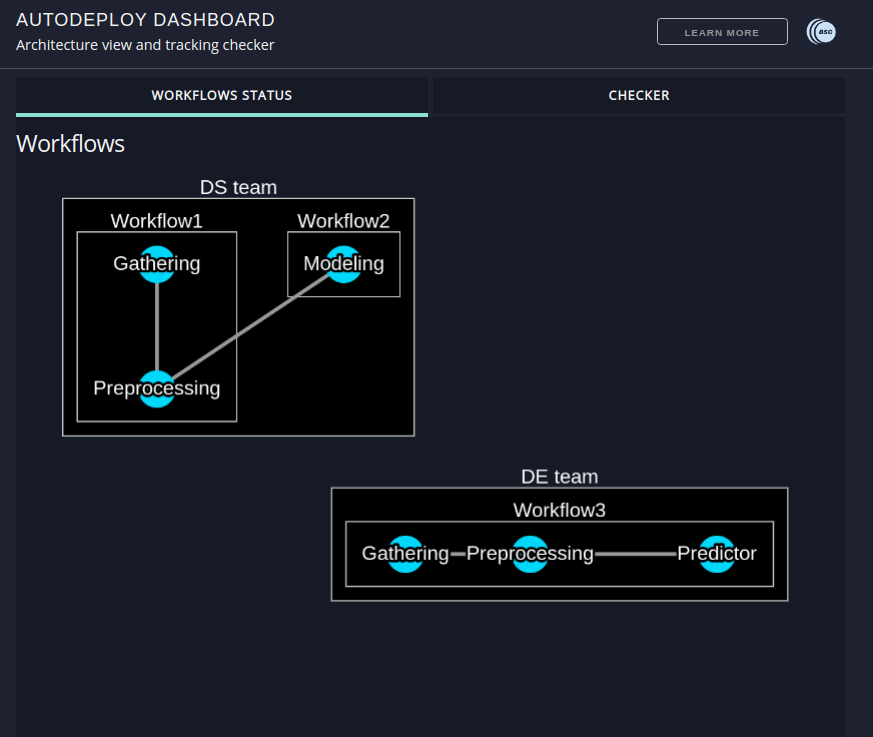

In [31]:
from IPython.display import Image
Image("pictures/dashboard1.png", width=500, height=500)


## Checker

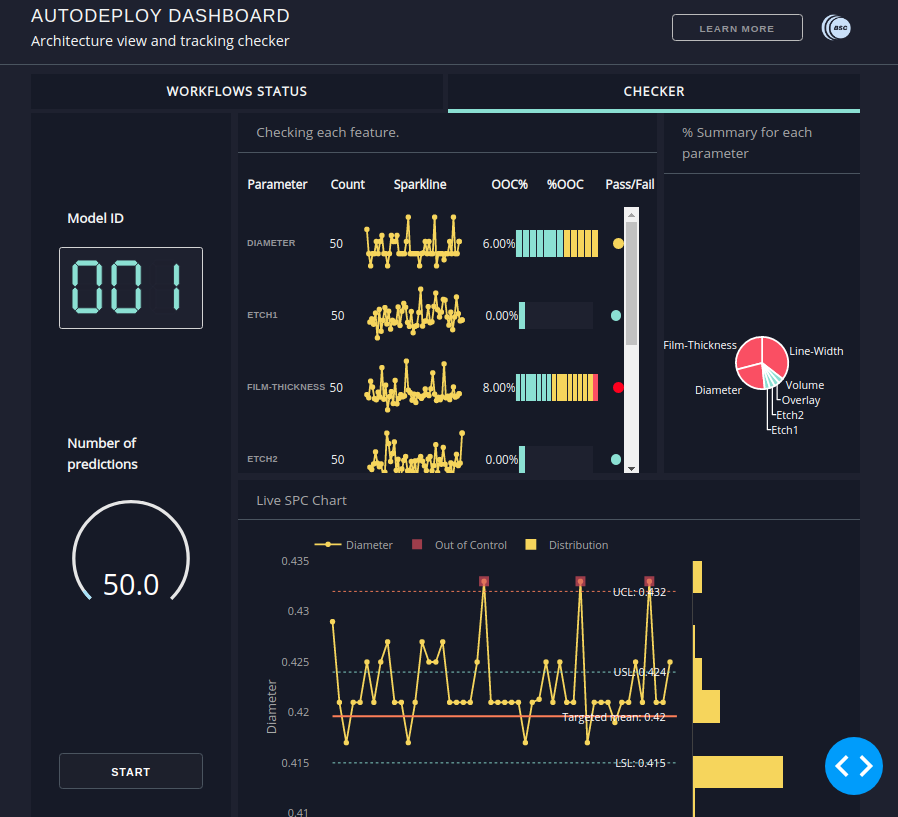

In [32]:
from IPython.display import Image
Image("pictures/dashboard2.png", width=500, height=500)


## Swarm single node (alpha)

In [ ]:
from IPython.display import Image
Image("pictures/swarm.png", width=900, height=900)

## Kubernetes single node (alpha)

- sudo snap install microk8s --classic --channel=1.15/stable (https://ubuntu.com/kubernetes/install)
- snap alias microk8s.kubectl kubectl
- enable dashboard: https://kubernetes.io/docs/tasks/access-application-cluster/web-ui-dashboard/
- token:token=$(sudo microk8s.kubectl -n kube-system get secret | grep default-token | cut -d " " -f1)
- token: sudo microk8s.kubectl -n kube-system describe secret $token
- sudo kubectl proxy
- sudo kompose up docker-compose.yml --volumes hostPath
- http://localhost:8001/api/v1/namespaces/kubernetes-dashboard/services/https:kubernetes-dashboard:/proxy/

In [ ]:
from IPython.display import Image
Image("kubernetes.png", width=900, height=900)

## Why is it useful?

- One of the hardest part of ML productionalizing lays on making the model easy to track, easy to deploy and easy to maintain. That's why having tools that lead to rapid prototyping and easy interpretation is crucial.

- Due to all the output work is based on Docker, it will be easily deploy in any environment, whether on-premise or cloud.

- **The main goal is to automate the model's life after modeling. It means, automate the post-modeling stage.**


# TODO

- Create executor for built-in functions and custom functions
- Add novice, medium and expert templates [DONE].
- Log the predictions, similar to an executor.
- Add templates (predefined examples) for ease of use: hello world, intermediate, advanced.
- Add exploratory checking built-in function.
- Add anomaly checking not only for artifacts but also for tracked variables.
- Change track saving to a database (e.g sqlite) for thousand of experiments.
- Integration between tracking and checking.
- Refine the interface module for checking. It has to provide an easy integration with new plugins.
- Define to keep using dictionaries or functions. Function provides autocompletation of parameters.
- Plot workflows with plotly.
- check assignment of plots automatically.
- add parallel option for specific workflows (e.g, modeling with other models, check multiprocessing) [DONE]
- add option to remove tracker metadata (mlruns).
- add option to remove checker metadata (input, predictions)
- Change scanflow.png in draw.io adding the new scheme (get_new_data) [DONE]
- Pass checker as an option, similar to tracker.
- Call all the scanflow paths from tools [DONE]
- Change deploy module: Not need workflow_eng object [DONE]
- Pass model's path as a parameter for deploy module [DONE] 
- Change the behaviour of workflow eng, run previous steps while predictions. [DONE]
- Modify python files in data-eng: change gathering.py (remove label) [DONE]
- Implement checker as tensorflow Model class (OO) [DONE]
- Save checker model [DONE]
- Save scaler for checker model [DONE]
- Provides parameters to python files [DONE]
- Test drift distribution checker model with different configuration
- Stack drift distribution checker by using many models.
- Start formalizing the paper.
- Enhance compatibility with docker-compose
- Save workflows metadata.
- Draw workflows (topology of our architecture).
- Dashboard for checker.
- Persistence on docker volumes (a req. for remote locations)
- Status, location, metadata for each workflow
- Uses cases: compose, swarm, kubernetes with affinity.
- Swarm multiple nodes
- Test kompose with kubernetes
- Fill the documentation
- Find use cases where scanflow can help
- Compare scanflow with other competitors [DONE]
- Post in medium about scanflow 
- Add a new plugin for integrity checking.
- Add option to compress all the settings needed to transfer an application.
- Add interface to write on databases.
- Add option to plot nested workflows in jupyter notebooks.

- Possible new name: from scanflow to pysmartflow (because of pip conflict name)

Funcionality
import uses cases
